In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import time
import requests
from datetime import datetime, timedelta
from shapely.geometry import Point
from busSim import BusSim
from graph import Graph

In [44]:
blocks = gpd. read_file("zip://DataMerge/dane_blocks_shapes.zip")
blocks = blocks.to_crs("EPSG:4326")

In [45]:
blocks

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,55,025,011504,1,550250115041,Block Group 1,G5030,S,1849504,0,+43.1906083,-089.2482047,"POLYGON ((-89.25928 43.18706, -89.25991 43.187..."
1,55,025,012501,1,550250125011,Block Group 1,G5030,S,3469020,0,+42.9077310,-089.3807759,"POLYGON ((-89.37390 42.91633, -89.37390 42.916..."
2,55,025,001403,1,550250014031,Block Group 1,G5030,S,2141835,8875,+43.0211647,-089.4410349,"POLYGON ((-89.44960 43.02226, -89.44958 43.022..."
3,55,025,013301,1,550250133011,Block Group 1,G5030,S,12509328,0,+43.2478834,-089.3162326,"POLYGON ((-89.34136 43.25267, -89.34141 43.253..."
4,55,025,013301,2,550250133012,Block Group 2,G5030,S,3830201,0,+43.2356950,-089.3326201,"POLYGON ((-89.33398 43.24769, -89.33167 43.247..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,55,025,011102,4,550250111024,Block Group 4,G5030,S,2270321,34087,+43.1140710,-089.4801041,"POLYGON ((-89.49144 43.11327, -89.49143 43.114..."
306,55,025,011102,2,550250111022,Block Group 2,G5030,S,2329858,7529,+43.1263555,-089.4965035,"POLYGON ((-89.50137 43.11301, -89.50137 43.113..."
307,55,025,011102,5,550250111025,Block Group 5,G5030,S,321007,4224,+43.1068366,-089.4780431,"POLYGON ((-89.47114 43.11042, -89.47154 43.110..."
308,55,025,012001,3,550250120013,Block Group 3,G5030,S,7241600,0,+43.0988322,-089.2184686,"POLYGON ((-89.24675 43.10702, -89.24676 43.107..."


In [46]:
madison= gpd.read_file("zip://DataMerge/city_Limit.zip")
madison= madison.to_crs("EPSG:4326")
mdf=gpd.sjoin(blocks, madison)
mdf=mdf[["GEOID10","geometry"]]

In [48]:
mdf

,GEOID10,geometry
2,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022..."
7,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089..."
8,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103..."
9,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098..."
10,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102..."
...,...,...
36,550250105021,"POLYGON ((-89.27644 43.02638, -89.27629 43.026..."
77,550250102001,"POLYGON ((-89.36699 43.09883, -89.36731 43.098..."
270,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098..."
277,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147..."


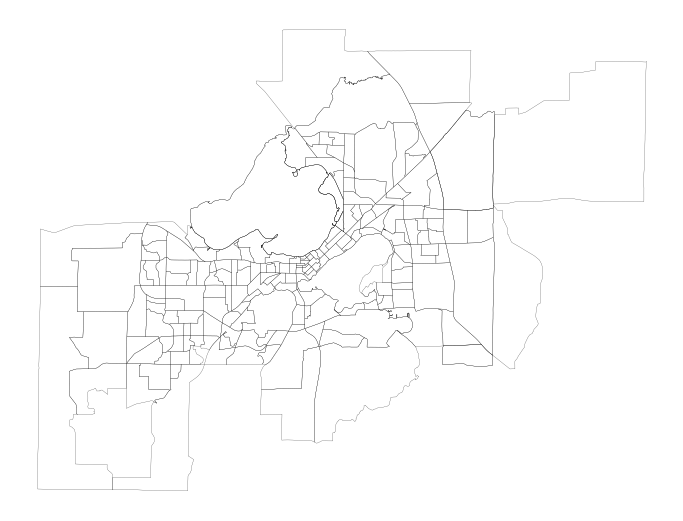

In [49]:
ax = mdf.boundary.plot(color="black",linewidth=0.2, figsize=(12,12))
ax.set_axis_off()

In [32]:
mdf.GEOID10

2      550250014031
7      550250020003
8      550250021002
9      550250021004
10     550250021003
           ...     
36     550250105021
77     550250102001
270    550250018042
277    550259917020
84     550250114021
Name: GEOID10, Length: 200, dtype: object

In [109]:
df = pd.read_csv("DataMerge/edu_and_poverty.csv")
df['ID']=df['GEO_ID'].map(lambda x:x.split("US")[1])
df

,Unnamed: 0,GEO_ID,Total Education Population,Enrolled at school,Total Family,under poverty level,ID
0,0,1500000US550250001001,903,209,239,8,550250001001
1,1,1500000US550250001002,1570,378,336,0,550250001002
2,2,1500000US550250002011,1238,260,352,21,550250002011
3,3,1500000US550250002012,787,118,232,0,550250002012
4,4,1500000US550250002021,1061,164,356,10,550250002021
...,...,...,...,...,...,...,...
305,305,1500000US550250133023,2302,604,730,16,550250133023
306,306,1500000US550250137001,4520,1484,1179,12,550250137001
307,307,1500000US550250137002,1539,333,307,16,550250137002
308,308,1500000US550259917020,0,0,0,0,550259917020


In [110]:
cdf = pd.merge(mdf,df,left_on="GEOID10",right_on="ID",how="left")
cdf = cdf.drop(columns=["Unnamed: 0","GEO_ID","ID"])

In [113]:
cdf["EduPerc"] = cdf["Enrolled at school"]/cdf["Total Education Population"]
cdf

,GEOID10,geometry,Total Education Population,Enrolled at school,Total Family,under poverty level,EduPerc
0,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022...",2861,802,901,0,0.280322
1,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089...",1510,413,412,0,0.273510
2,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103...",1093,209,293,40,0.191217
3,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098...",985,221,299,0,0.224365
4,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102...",902,201,177,0,0.222838
...,...,...,...,...,...,...,...
195,550250105021,"POLYGON ((-89.27644 43.02638, -89.27629 43.026...",1497,342,453,0,0.228457
196,550250102001,"POLYGON ((-89.36699 43.09883, -89.36731 43.098...",1316,292,412,0,0.221884
197,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098...",2063,522,322,36,0.253030
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",0,0,0,0,NaN


In [114]:
from sklearn import preprocessing
# cite from https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc
# Get column names first

df = cdf.iloc[:,2:]
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
cdf.iloc[:,2:] = scaled_df
cdf

,GEOID10,geometry,Total Education Population,Enrolled at school,Total Family,under poverty level,EduPerc
0,550250014031,"POLYGON ((-89.44960 43.02226, -89.44958 43.022...",1.406182,0.610122,2.088579,-0.622341,-0.076308
1,550250020003,"POLYGON ((-89.33433 43.08995, -89.33429 43.089...",-0.090735,-0.183131,0.235853,-0.622341,-0.111629
2,550250021002,"POLYGON ((-89.34428 43.10322, -89.34435 43.103...",-0.552773,-0.599130,-0.215015,0.630169,-0.538352
3,550250021004,"POLYGON ((-89.36409 43.09863, -89.36409 43.098...",-0.672438,-0.574660,-0.192282,-0.622341,-0.366463
4,550250021003,"POLYGON ((-89.34989 43.10227, -89.34978 43.102...",-0.764403,-0.615444,-0.654516,-0.622341,-0.374383
...,...,...,...,...,...,...,...
195,550250105021,"POLYGON ((-89.27644 43.02638, -89.27629 43.026...",-0.105139,-0.327915,0.391194,-0.622341,-0.345247
196,550250102001,"POLYGON ((-89.36699 43.09883, -89.36731 43.098...",-0.305688,-0.429876,0.235853,-0.622341,-0.379328
197,550250018042,"POLYGON ((-89.36408 43.09883, -89.36409 43.098...",0.521993,0.039143,-0.105139,0.504918,-0.217828
198,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN


In [127]:
cdf = cdf.sort_values("EduPerc")
cdf

,GEOID10,geometry,Total Education Population,Enrolled at school,Total Family,under poverty level,EduPerc
124,550250004081,"POLYGON ((-89.49717 43.05316, -89.49742 43.053...",-0.295716,-0.833640,-0.446132,0.223103,-1.162017
49,550250005013,"POLYGON ((-89.47387 43.02685, -89.47434 43.026...",-0.823127,-0.900934,-0.313524,-0.622341,-1.157320
117,550250120021,"POLYGON ((-89.24673 43.10667, -89.24637 43.106...",-1.265221,-0.958032,-0.703770,-0.622341,-1.149624
70,550250027003,"POLYGON ((-89.33281 43.09672, -89.33284 43.097...",-0.679086,-0.851993,-0.302157,0.223103,-1.079673
186,550250015012,"POLYGON ((-89.35422 43.04381, -89.35787 43.043...",-1.156637,-0.921326,-0.813646,-0.183962,-1.047304
...,...,...,...,...,...,...,...
17,550250016064,"POLYGON ((-89.40073 43.07209, -89.40019 43.072...",0.875447,3.832076,-1.325134,-0.622341,3.655508
153,550250016063,"POLYGON ((-89.39600 43.06863, -89.39382 43.067...",-0.413164,1.460473,-1.325134,-0.622341,3.655508
172,550259917020,"POLYGON ((-89.41319 43.14705, -89.41301 43.147...",-1.763824,-1.025326,-1.325134,-0.622341,NaN
173,550259917030,"POLYGON ((-89.32590 43.08304, -89.32585 43.082...",-1.763824,-1.025326,-1.325134,-0.622341,NaN


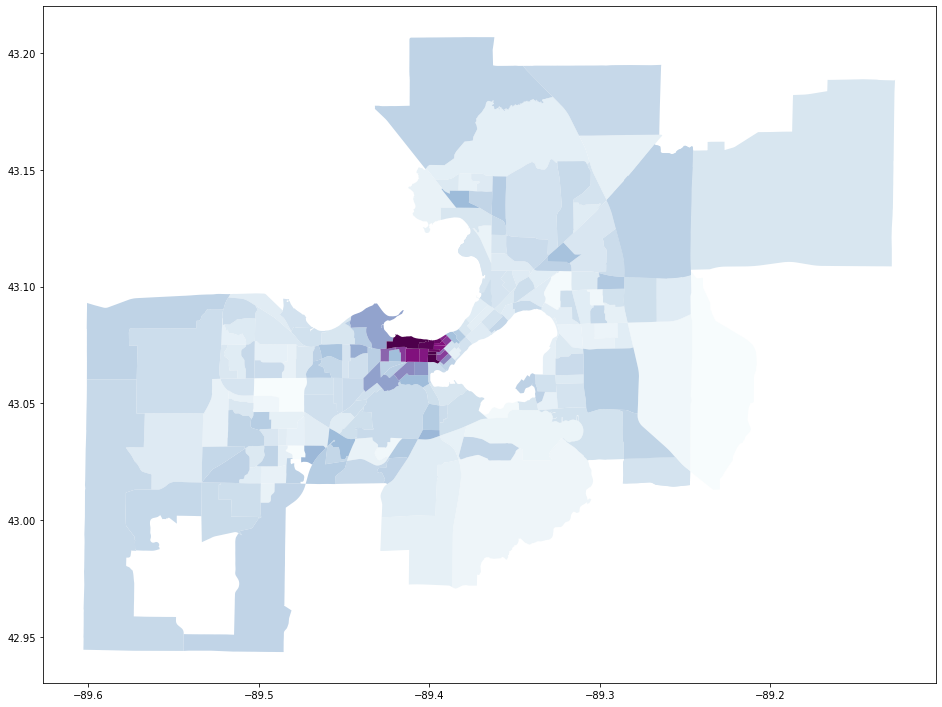

In [126]:
ax = cdf.plot(column="EduPerc",cmap = "BuPu",alpha = 1,figsize=(16,16))